In [2]:
import os
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [10]:
IMG_SIZE = 228

train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [11]:
DATA_DIR = "../data/chest_xray"

train_dataset = datasets.ImageFolder(
    root=os.path.join(DATA_DIR, "train"),
    transform=train_transforms
)

test_dataset = datasets.ImageFolder(
    root=os.path.join(DATA_DIR, "test"),
    transform=test_transforms
)

class_names = train_dataset.classes
print("Clases:", class_names)


Clases: ['NORMAL', 'PNEUMONIA']


In [12]:
BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [13]:
def show_images(dataset, class_names, n_per_class=5):
    plt.figure(figsize=(10, 4))
    idx = 0
    
    for class_idx, class_name in enumerate(class_names):
        count = 0
        i = 0
        while count < n_per_class:
            image, label = dataset[i]
            if label == class_idx:
                plt.subplot(len(class_names), n_per_class, idx + 1)
                
                # Desnormalizar
                img = image.permute(1, 2, 0)
                img = img * 0.5 + 0.5
                
                plt.imshow(img)
                plt.title(class_name)
                plt.axis("off")
                
                idx += 1
                count += 1
            i += 1
    
    plt.show()


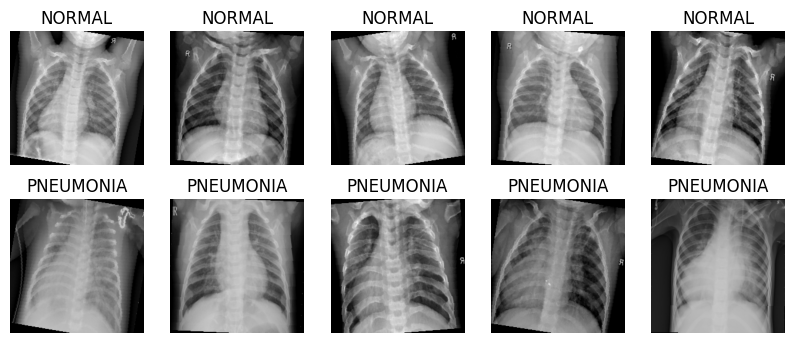

In [15]:
show_images(train_dataset, class_names, n_per_class=5)

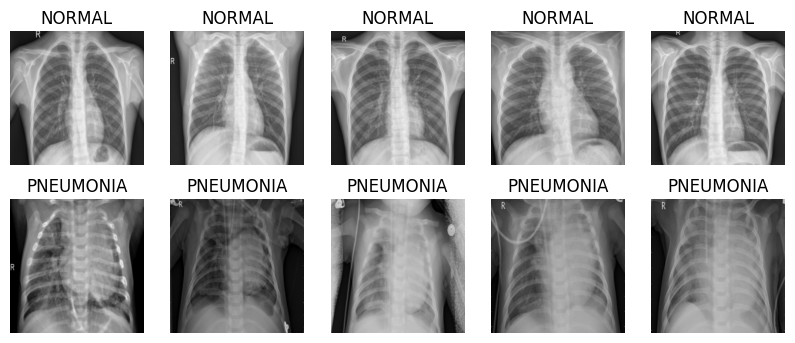

In [20]:
show_images(test_dataset, class_names, n_per_class=5)

In [17]:
print("Train samples:", len(train_dataset))
print("Test samples:", len(test_dataset))


Train samples: 5216
Test samples: 624


In [19]:
from collections import Counter

train_counts = Counter(train_dataset.targets)
test_counts = Counter(test_dataset.targets)

print("Train:", train_counts)
print("Test:", test_counts)

print("Total train:", len(train_dataset))
print("Total test:", len(test_dataset))


Train: Counter({1: 3875, 0: 1341})
Test: Counter({1: 390, 0: 234})
Total train: 5216
Total test: 624
